In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Datetime objects in Python, Numpy and Pandas
- Native python date and times

In [2]:
from datetime import datetime

In [7]:
d = datetime(year = 2022, month =4, day = 12)
d

datetime.datetime(2022, 4, 12, 0, 0)

In [9]:
# once you have a dateime object, you can do things like pringting the day of the week:

d.strftime('%y-%B')

'22-April'

In [10]:
type(d)

datetime.datetime

In [12]:
date = np.array('2015-07-14', dtype = np.datetime64)
date

array('2015-07-14', dtype='datetime64[D]')

In [13]:
date

array('2015-07-14', dtype='datetime64[D]')

In [16]:
np.arange(1,3, 0.25)

array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75])

In [18]:
# Now we can quickly do vectorized operations on it!

In [19]:
date + np.arange(1,5)

array(['2015-07-15', '2015-07-16', '2015-07-17', '2015-07-18'],
      dtype='datetime64[D]')

#### Pandas time series data type:
- timestamp
- 'datetimeindex' = datetime object as index

In [21]:
# layers so far:
# basic datetime object
# biolt on top of that: np.tatetime64
# one more:
# pd.Timestamp()

In [20]:
t = pd.Timestamp('2021-04-11, 1:58:31')
t

Timestamp('2021-04-11 01:58:31')

In [23]:
# can pandas read these dates?

dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', 
                        '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [24]:
t.quarter

2

In [25]:
t.weekday(), t.day_name()

(6, 'Sunday')

In [26]:
# We will use Ethererum price data from 2017-2020 to demo Pandas capability for time-series data

sheet_url = 'https://docs.google.com/spreadsheets/d/1kTrAFSrr-xP3REs0Lly0TdV4ekrHahBXLg9r5qKxmV8/edit#gid=0'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)
df.head(10)

,Date,Symbol,Close,Volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44
5,2020-03-13 08-PM,ETHUSD,124.85,1940673.93
6,2020-03-13 08-AM,ETHUSD,128.39,6808571.23
7,2020-03-13 07-PM,ETHUSD,134.03,7579741.09
8,2020-03-13 07-AM,ETHUSD,131.35,5255468.75
9,2020-03-13 06-PM,ETHUSD,128.93,4898735.81


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Close   23674 non-null  float64
 3   Volume  23674 non-null  float64
dtypes: float64(2), object(2)
memory usage: 739.9+ KB


In [28]:
# check for nulls

df.isnull().sum()

Date      0
Symbol    0
Close     0
Volume    0
dtype: int64

<AxesSubplot:>

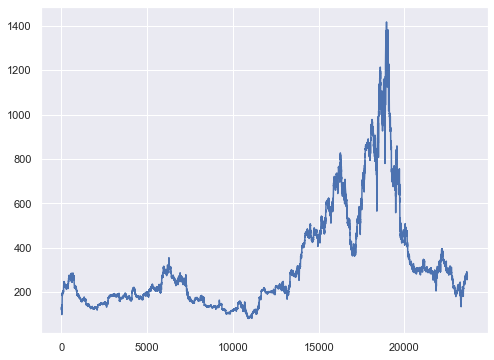

In [29]:
# use pandas .plot()

df.Close.plot()

### Time series analysis: How to make pandas time-aware and leverage inbuild functionality:

Convert 'date/time' column to datetime object in Pandas (pd.to_datetime())
Set the datetime column as Index
Sort the datetime index

In [30]:
pd.to_datetime('Jan 1 1970')

Timestamp('1970-01-01 00:00:00')

#### Can pandas read this datetime string?

pd.to_datetime('2020=04-11 2PM')

In [32]:
# Sometimes we have to specify the format of the datatime string to help pandas parse the date/time)

pd.to_datetime('2020-03-13 08-PM', format='%Y-%m-%d %I-%p')

Timestamp('2020-03-13 20:00:00')

In [33]:
df.head()

,Date,Symbol,Close,Volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44


In [35]:
# step 1: Lets convert the "Date" column in our df to pandas dataframe
df.Date = pd.to_datetime(df.Date, format = '%Y-%m-%d %I-%p')

In [42]:
# confrim that the 'Date' column is indeed a dateime object now
df.Date, df.dtypes

(0       2020-03-13 12:00:00
 1       2020-03-13 00:00:00
 2       2020-03-13 11:00:00
 3       2020-03-13 10:00:00
 4       2020-03-13 09:00:00
                 ...        
 23669   2017-07-01 17:00:00
 23670   2017-07-01 16:00:00
 23671   2017-07-01 15:00:00
 23672   2017-07-01 14:00:00
 23673   2017-07-01 13:00:00
 Name: Date, Length: 23674, dtype: datetime64[ns],
 Date      datetime64[ns]
 Symbol            object
 Close            float64
 Volume           float64
 dtype: object)

In [43]:
# step 2 and 3 combined: Set 'Date' column as Index and sort the index
df = df.set_index('Date').sort_index()

In [44]:
df.head()

,Symbol,Close,Volume
Date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55


In [45]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

<AxesSubplot:xlabel='Date'>

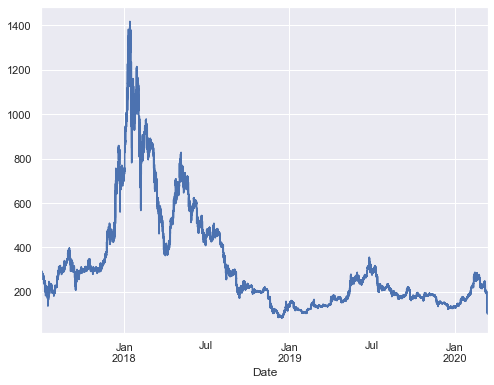

In [46]:
# lets plot the closing price again and how it compares to previously plotted
df.Close.plot()

In [47]:
df.head()

,Symbol,Close,Volume
Date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55


In [50]:
# add a new column called 'day' which is the weekday'
df['day'] = df.index.day_name()

In [51]:
df.head()

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


<AxesSubplot:xlabel='day'>

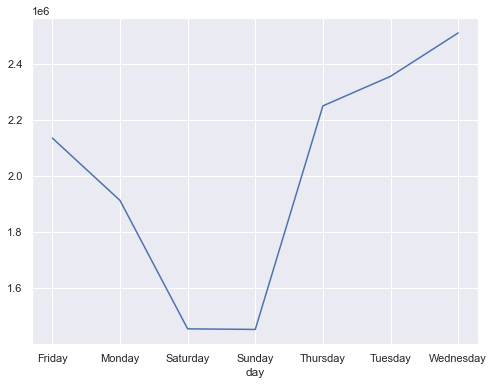

In [52]:
# can i use groupby to see mean trading volumn by day?

df.groupby('day').mean().Volume.plot()

# How to choose subset of a dataframe?

In [59]:
# notice where the indexing stops
df

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday
...,...,...,...,...
2020-03-13 16:00:00,ETHUSD,127.57,4461424.71,Friday
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 18:00:00,ETHUSD,128.93,4898735.81,Friday


In [65]:
df.loc['2017-07-1 11:00:00']

Symbol      ETHUSD
Close       257.13
Volume   679358.87
day       Saturday
Name: 2017-07-01 11:00:00, dtype: object

In [66]:
# changing the range of the dataframe
df['2017': '2019']

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday
...,...,...,...,...
2019-12-31 19:00:00,ETHUSD,131.10,1169847.84,Tuesday
2019-12-31 20:00:00,ETHUSD,129.29,428183.38,Tuesday
2019-12-31 21:00:00,ETHUSD,128.83,350155.69,Tuesday


In [62]:
# choose rows for '2017-07=01' (show only first 10 values)
df['2017': '2019'][:10]

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday
2017-07-01 16:00:00,ETHUSD,265.74,1287300.75,Saturday
2017-07-01 17:00:00,ETHUSD,272.57,1894983.33,Saturday
2017-07-01 18:00:00,ETHUSD,268.00,5396852.35,Saturday
2017-07-01 19:00:00,ETHUSD,263.51,3962669.00,Saturday


## Changing the Period

- Upsampling - increasing frequency

This will result in empty observations which you may choose to fill with .ffill(), .bfill(), or some other method.
- Downsampling - reducing frequency

In [67]:
df.head()

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [68]:
# Upsample using asfreq() method

# How can we take care of new NaNs introduced in our data by asfreq method?

df.asfreq('45Min', method = 'ffill')

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:45:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:30:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:15:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
...,...,...,...,...
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 17:45:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 18:30:00,ETHUSD,128.93,4898735.81,Friday


## Further notes

- cahnge this to have a datetime index
coffee_df['date'] = pd.to_datetime(coffee_df.date)
coffee_df.asfreq()

coffee_df['weekday'] coffee_df.date.dt.day_name()

coffee_df['month'] = coffee_df.date.dt.month

coffee_df.head()

- Change index to datetime

coffee_df.set_index('date').sort_index()

coffe_df.asfreq('D')

by_day = coffee_df.asfreq('D')

by_day.assign(ffill = lambda coffee_df.coffee_consumption.ffill()
                bfill = lambda coffe_df.coffee_consumption.bfill())
                
- filling missing values

by_day['month'] = by_day.index.month

by_day['weekday'] = by_day.index.day

by_day.fillna(0)




## What did we do our dataframe (size?)
### Code Description

#### D Calendar day
#### W Weekly
#### M Month end
#### Q Quarter end
#### A Year end
#### H Hours
#### T Minutes
#### S Seconds
#### L Milliseonds
#### U Microseconds
#### N nanoseconds

In [69]:
# Back to the therium dataset

df.head()

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [71]:
df.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    23674 non-null  datetime64[ns]
 1   Symbol  23674 non-null  object        
 2   Close   23674 non-null  float64       
 3   Volume  23674 non-null  float64       
 4   day     23674 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 924.9+ KB


In [73]:
df.head()

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [78]:
# resampling is allowing us to aggregate on a biggervalue of date than our
# base level of granularity
# think of it as a groupby but for time
# mean value where appropriate

df.resample('Y').mean()

,Close,Volume
Date,,
2017-12-31,351.97,2948844.73
2018-12-31,480.93,2733347.11
2019-12-31,180.75,936000.88
2020-12-31,197.57,1415723.35


In [75]:
df.Symbol.value_counts()

ETHUSD    23674
Name: Symbol, dtype: int64

In [80]:
df.resample('M').mean().head()

,Close,Volume
Date,,
2017-07-31,220.01,2480603.27
2017-08-31,298.51,2056355.72
2017-09-30,298.52,2331871.43
2017-10-31,305.65,1096152.84
2017-11-30,355.65,2741743.75


<AxesSubplot:xlabel='Date'>

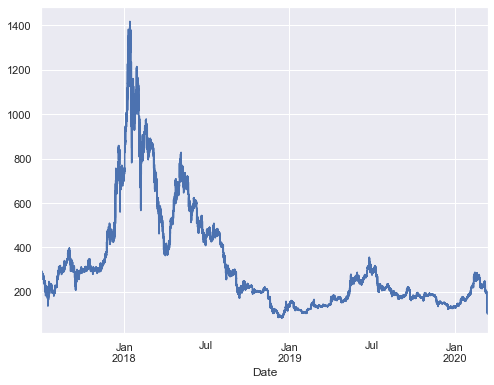

In [81]:
# plot raw data with month resampled data

df.Close.plot(label = 'Original Granularity')

<AxesSubplot:xlabel='Date'>

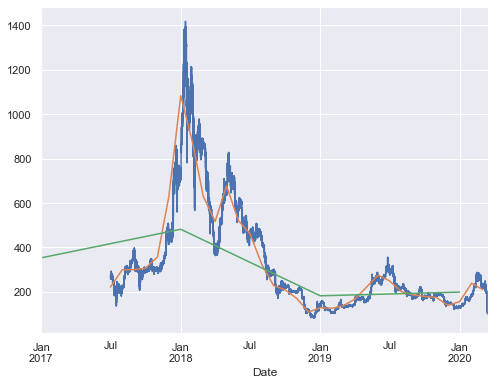

In [85]:
df.Close.plot(label = 'Original Granularity')
df.resample('M').mean().Close.plot(label = 'Monthly resample')
df.resample('Y').mean().Close.plot(label = 'Yearly resample')

## Resampling

- Fundamentally data aggregation (similar to groupby but for dates)
    - as opposed to afreq which is more of a 'data selection'
- Only works on dataframes with a datetime index
In [51]:


In [86]:
df.head()


,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [88]:
# first 3 rows will be skipped because the 4th average only comes on the 4th row

df.rolling(4).mean()

,Close,Volume
Date,,
2017-07-01 11:00:00,NaN,NaN
2017-07-01 12:00:00,NaN,NaN
2017-07-01 13:00:00,NaN,NaN
2017-07-01 14:00:00,267.52,1554261.65
2017-07-01 15:00:00,270.44,1759492.57
...,...,...
2020-03-13 16:00:00,118.56,6289262.63
2020-03-13 17:00:00,127.29,4581942.13
2020-03-13 18:00:00,126.79,4873146.86


In [89]:
# Resampling and rolling average together

df.resample('W').mean().Close.rolling(4).mean()

Date
2017-07-02      NaN
2017-07-09      NaN
2017-07-16      NaN
2017-07-23   234.44
2017-07-30   218.21
              ...  
2020-02-16   201.10
2020-02-23   226.48
2020-03-01   241.13
2020-03-08   246.68
2020-03-15   226.96
Freq: W-SUN, Name: Close, Length: 142, dtype: float64

In [90]:
# Resampling and rolling average together (26 weeks rolling average)

df.resample('W').mean().Close.rolling(26).mean()

Date
2017-07-02      NaN
2017-07-09      NaN
2017-07-16      NaN
2017-07-23      NaN
2017-07-30      NaN
              ...  
2020-02-16   172.29
2020-02-23   175.10
2020-03-01   177.40
2020-03-08   179.47
2020-03-15   179.28
Freq: W-SUN, Name: Close, Length: 142, dtype: float64

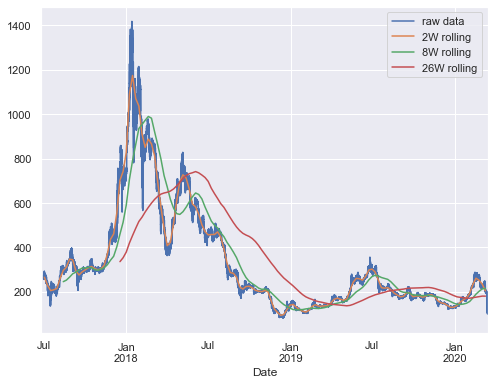

In [91]:
# %matplotlib notebook


df.Close.plot(label = 'raw data')
df.resample('W').mean().Close.rolling(2).mean().plot(label = '2W rolling')
df.resample('W').mean().Close.rolling(8).mean().plot(label = '8W rolling')
df.resample('W').mean().Close.rolling(26).mean().plot(label = '26W rolling')
plt.legend()

### What other rolling averages can we use?
# Lagging and Lead

- Shift: move the data backwards and forwards by a given amount
- diff: find the difference with the previous observation (or a specified further back observation)
- Can be used to computing differences over time

In [92]:
df_daily = df.resample('D').mean()
df_daily.head(10)

,Close,Volume
Date,,
2017-07-01,265.28,2198771.14
2017-07-02,269.78,2177595.32
2017-07-03,278.88,1459014.73
2017-07-04,276.74,1254579.39
2017-07-05,265.03,1797923.44
2017-07-06,266.48,962700.63
2017-07-07,253.94,1801485.06
2017-07-08,241.55,1356294.00
2017-07-09,244.81,729444.92


In [93]:
# Use 'shift' to move the timeseries into the future

df_daily['shift(1)'] = df_daily.Close.shift(1)
df_daily.head(10)

,Close,Volume,shift(1)
Date,,,
2017-07-01,265.28,2198771.14,NaN
2017-07-02,269.78,2177595.32,265.28
2017-07-03,278.88,1459014.73,269.78
2017-07-04,276.74,1254579.39,278.88
2017-07-05,265.03,1797923.44,276.74
2017-07-06,266.48,962700.63,265.03
2017-07-07,253.94,1801485.06,266.48
2017-07-08,241.55,1356294.00,253.94
2017-07-09,244.81,729444.92,241.55


In [94]:
# create a new column 'diff(1)'
df_daily['diff(1)'] = df_daily.Close.diff(1)
df_daily.head(10)

,Close,Volume,shift(1),diff(1)
Date,,,,
2017-07-01,265.28,2198771.14,NaN,NaN
2017-07-02,269.78,2177595.32,265.28,4.50
2017-07-03,278.88,1459014.73,269.78,9.10
2017-07-04,276.74,1254579.39,278.88,-2.14
2017-07-05,265.03,1797923.44,276.74,-11.72
2017-07-06,266.48,962700.63,265.03,1.45
2017-07-07,253.94,1801485.06,266.48,-12.54
2017-07-08,241.55,1356294.00,253.94,-12.39
2017-07-09,244.81,729444.92,241.55,3.27


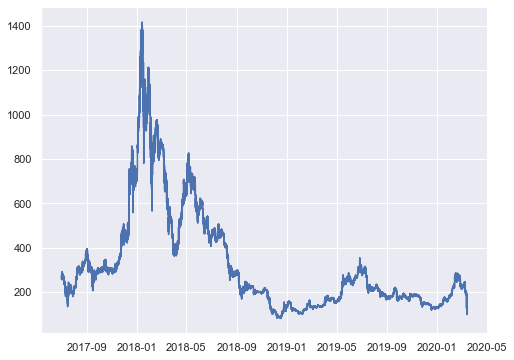

In [95]:
plt.plot(df.Close)

(17348.0, 18048.0)

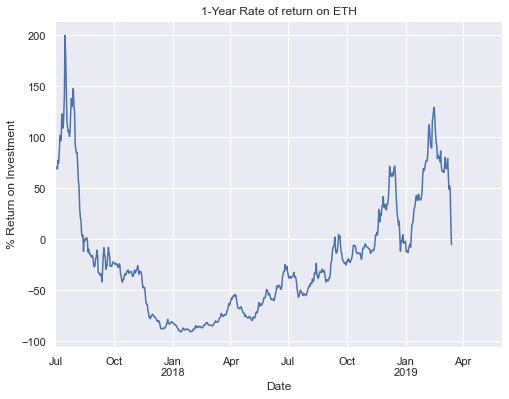

In [97]:
# %matplotlib inline
# Use for shift/diff to calculate 1 year rate of return

((df_daily.Close.shift(-365)/df_daily.Close -1) *100).plot()
plt.ylabel('% Return on Investment')
plt.title('1-Year Rate of return on ETH')
plt.xlim(pd.Timestamp('2017-07'), pd.Timestamp('2019-06'))

# Time Zone

In [98]:
# datetime with no timezone specified (sometimes called timezone naive datetime object)

t = pd.Timestamp('2020-04-14 10:20:20')
t

Timestamp('2020-04-14 10:20:20')

In [99]:
#create a datetime object with specify timezone

t1 = pd.Timestamp('2020-04-14, 07:50', tz = 'US/Central')
t1

Timestamp('2020-04-14 07:50:00-0500', tz='US/Central')

In [100]:
# localize a naive timezone
t_localized = t.tz_localize('US/Central')
t_localized

Timestamp('2020-04-14 10:20:20-0500', tz='US/Central')

In [101]:
# convert to a different timezone

t_localized.tz_convert(tz = 'Asia/tokyo')

Timestamp('2020-04-15 00:20:20+0900', tz='Asia/Tokyo')

In [102]:
# Can I convert a naive timestamp to a particular timezone?
t.tz_convert(tz = 'Asia/tokyo')

TypeError: Cannot convert tz-naive Timestamp, use tz_localize to localize

# Time Delta

In [103]:
# What is date and time right now? Take any datetime object and use .now() method

pd.Timestamp.now()

Timestamp('2022-04-12 15:46:26.665604')

In [104]:
# time delta between now (today's date) and t

(pd.Timestamp.now() - t)

Timedelta('728 days 05:26:16.085369')

In [105]:
# Can we find time delta between t and t1?

t, t_localized
t-t_localized

TypeError: Timestamp subtraction must have the same timezones or no timezones

In [106]:
# To convert the above Timedelta object to a number:

(pd.Timestamp.now() - t) // pd.Timedelta('1d')

728